# Homework 1

## SVM Modeling

In [4]:
import os

#Data Manipulation Libraries
import pandas as pd
import numpy as np

#Regression Libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn import svm
from scipy import stats

#Visualization Libraries
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
#Checking where the Python Library is:
os.getcwd()

'C:\\Users\\cxs1rgf\\OneDrive - The Home Depot\\Desktop\\GitHub\\DataModeling\\Individual\\1.Candice\\Homework 1'

### Reading in Data

In [6]:
df = pd.read_csv('..\..\..\homework assignments\hw1-Fall_21\data 2.2\credit_card_data.txt',sep = '\t', header = None)
df.head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,1,30.83,0.0,1.25,1,0,1,1,202,0,1


In [7]:
len(df)

654

### Preprocessing Data
First separating X & y variables

In [8]:
#turning column names into list
cols = df.columns.tolist()

#Removing the first column name & assigning it to y_labels
y_labels = cols.pop(10)

#seting x_labels equal to the remaining columns
x_labels = cols

y = df[y_labels]
X = df[x_labels]

Scaling X data

In [9]:
scaler = StandardScaler()

X_scaled = scaler.fit(X)
X_scaled

StandardScaler()

Splitting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [11]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8629441624365483


## KNN Modeling

Will need to try different number of neighbors to find optimal fit

In [21]:
score = []
for i in range(1,400):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    # print(knn.predict(X_test))
    score.append(knn.score(X_test,y_test))

Plotting Accuracies to find optimal number of clusters

We find the best accuracies with smaller number of clusters

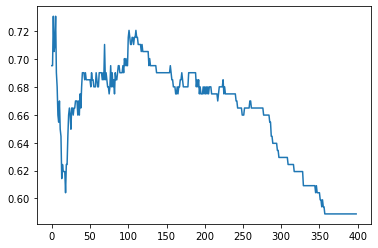

In [22]:
fig = plt.figure()
ax = plt.axes()

ax.plot(score)

Redoing with smaller number of clusters, the optimal number is between 2 & 5 groups

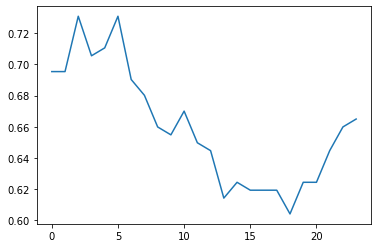

In [23]:
score = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    # print(knn.predict(X_test))
    score.append(knn.score(X_test,y_test))
    
fig = plt.figure()
ax = plt.axes()

ax.plot(score)